<a href="https://colab.research.google.com/github/py242005463/CEE2/blob/main/Trabalho_CEE2PY_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho


# 1. Acessar API do Banco Central.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Parâmetros fixos
investimento_unico = 5000
aporte_diario = 100

#csv local com dados do selic
conteudo_csv = """data;valor
01/03/2024;0,0115
04/03/2024;0,0115
05/03/2024;0,0115
06/03/2024;0,0115
07/03/2024;0,0115
08/03/2024;0,0115
"""

with open("selic_exemplo.csv", "w", encoding="utf-8") as f:
    f.write(conteudo_csv)

df = pd.read_csv("selic_exemplo.csv", sep=';', encoding='latin1')

# Corrigir possível problema de coluna única
if df.shape[1] == 1:
    df = pd.read_csv("selic_exemplo.csv", sep=';', encoding='latin1', engine='python')
    df.columns = df.columns[0].split(';')

# Renomear e converter colunas
df.rename(columns=lambda x: x.strip().lower(), inplace=True)
df.rename(columns={'data': 'Data', 'valor': 'Selic_Diaria'}, inplace=True)
df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df['Selic_Diaria'] = df['Selic_Diaria'].str.replace(',', '.').astype(float)

# 2. Converter Taxa Diária.

In [7]:
#Converter a taxa diária em anual
df['Selic_Anual'] = (1 + df['Selic_Diaria'] / 100) ** 252 - 1

# 3. Cálculo da Taxa Selic acumulada.

In [8]:
#Calcula a Taxa Selic acumulada
acumulado = (1 + df['Selic_Diaria'] / 100).cumprod() - 1
df['Selic_Acumulada'] = acumulado

#4. Apresenta os resultados em uma planilha.

In [10]:
#Faz a planilha dos resultados
tabela = df.copy()
tabela['Selic_Anual'] *= 100
tabela['Selic_Acumulada'] *= 100

print(tabela[['Data', 'Selic_Diaria', 'Selic_Anual', 'Selic_Acumulada']])

        Data  Selic_Diaria  Selic_Anual  Selic_Acumulada
0 2024-03-01        0.0115     2.940229         0.011500
1 2024-03-04        0.0115     2.940229         0.023001
2 2024-03-05        0.0115     2.940229         0.034504
3 2024-03-06        0.0115     2.940229         0.046008
4 2024-03-07        0.0115     2.940229         0.057513
5 2024-03-08        0.0115     2.940229         0.069020


#5. Apresenta as 3 séries em gráfico.

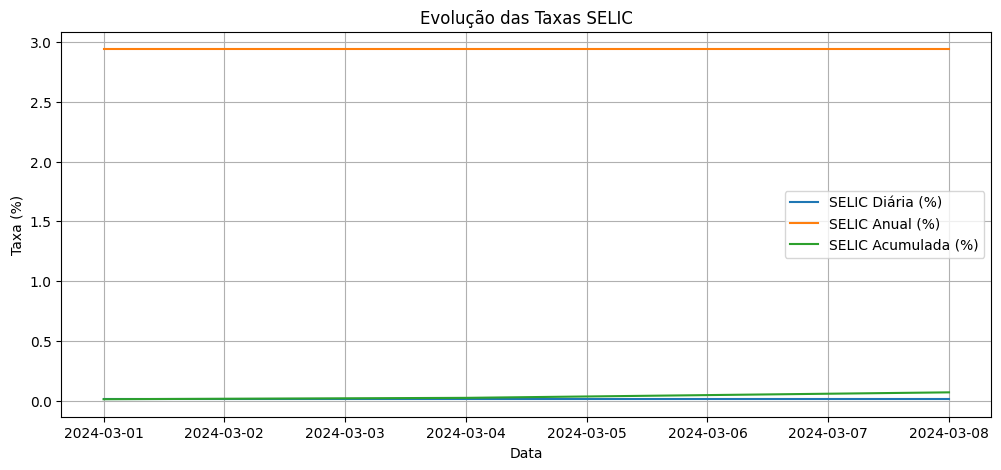

In [11]:
#Faz o gráfico das séries
plt.figure(figsize=(12, 5))
plt.plot(df['Data'], df['Selic_Diaria'], label='SELIC Diária (%)')
plt.plot(df['Data'], df['Selic_Anual'] * 100, label='SELIC Anual (%)')
plt.plot(df['Data'], df['Selic_Acumulada'] * 100, label='SELIC Acumulada (%)')
plt.xlabel('Data')
plt.ylabel('Taxa (%)')
plt.legend()
plt.title('Evolução das Taxas SELIC')
plt.grid(True)
plt.show()

#6. Apresenta qual foi o período com maior ou menor taxa de juros.

In [12]:
#Mostra o período de maior e menor taxa de juros
maior = df[df['Selic_Anual'] == df['Selic_Anual'].max()]
menor = df[df['Selic_Anual'] == df['Selic_Anual'].min()]
print(f"Maior taxa anual: {maior['Selic_Anual'].values[0]*100:.2f}% em {maior['Data'].dt.strftime('%d/%m/%Y').values[0]}")
print(f"Menor taxa anual: {menor['Selic_Anual'].values[0]*100:.2f}% em {menor['Data'].dt.strftime('%d/%m/%Y').values[0]}")

Maior taxa anual: 2.94% em 01/03/2024
Menor taxa anual: 2.94% em 01/03/2024


#7. Simulação de Investimento único.

In [14]:
#Simulação de investimento único
valores = [investimento_unico]
for taxa in df['Selic_Diaria'][1:]:
    novo_valor = valores[-1] * (1 + taxa / 100)
    valores.append(novo_valor)
df['Valor_Investido_Unico'] = valores

print("\nSimulação - Investimento Único:")
print(df[['Data', 'Selic_Diaria', 'Valor_Investido_Unico']])


Simulação - Investimento Único:
        Data  Selic_Diaria  Valor_Investido_Unico
0 2024-03-01        0.0115            5000.000000
1 2024-03-04        0.0115            5000.575000
2 2024-03-05        0.0115            5001.150066
3 2024-03-06        0.0115            5001.725198
4 2024-03-07        0.0115            5002.300397
5 2024-03-08        0.0115            5002.875661


#8. Investimento recorrente.

In [16]:
#Simulação de investimento recorrente
valores_recorrente = []
saldo = 0
for taxa in df['Selic_Diaria']:
    saldo = (saldo + aporte_diario) * (1 + taxa / 100)
    valores_recorrente.append(saldo)
df['Valor_Investido_Recorrente'] = valores_recorrente

print("\nSimulação - Investimento recorrente:")
print(df[['Data', 'Selic_Diaria', 'Valor_Investido_Recorrente']])


Simulação - Investimento recorrente:
        Data  Selic_Diaria  Valor_Investido_Recorrente
0 2024-03-01        0.0115                  100.011500
1 2024-03-04        0.0115                  200.034501
2 2024-03-05        0.0115                  300.069005
3 2024-03-06        0.0115                  400.115013
4 2024-03-07        0.0115                  500.172526
5 2024-03-08        0.0115                  600.241546
